In [10]:
# Set working directory to project root
import os
os.chdir('/Users/sofie/Desktop/gsponer-lab-work/phospho_root')
print(f"Working directory set to: {os.getcwd()}")


Working directory set to: /Users/sofie/Desktop/gsponer-lab-work/phospho_root


In [11]:

# Calculate percentage of dataset with aligned phosphosites
# Adjust the file path below as needed
import pandas as pd

# Use relative path to the file (working directory is now set to project root)
aligned_data_path = "data/processed/rat/full_total_blast_aligned.csv"
print("For blasted and aligned rat data:")

aligned_df = pd.read_csv(aligned_data_path)

# Count total number of phosphosites
total_phosphosites = len(aligned_df)

# Count phosphosites with successful alignment
aligned_phosphosites = aligned_df['alignment_success'].sum()

# Calculate percentage
alignment_percentage = (aligned_phosphosites / total_phosphosites) * 100

# Calculate percentage of phosphosites with match_method == "blast" (from paper_blast)
blast_phosphosites = aligned_df[aligned_df['match_method'] == 'blast'].shape[0]
blast_percentage = (blast_phosphosites / total_phosphosites) * 100

print(f"Total phosphosites in dataset (after cleaning): {total_phosphosites:,}")
print(f"Successfully aligned phosphosites: {aligned_phosphosites:,}")
print(f"Percentage of dataset with aligned phosphosites: {alignment_percentage:.2f}%")
print(f"Percentage of dataset with failed alignment: {100 - alignment_percentage:.2f}%")
print(f"Percentage of phosphosites found from paper_blast: {blast_percentage:.2f}%")

For blasted and aligned rat data:
Total phosphosites in dataset (after cleaning): 23,004
Successfully aligned phosphosites: 21,033
Percentage of dataset with aligned phosphosites: 91.43%
Percentage of dataset with failed alignment: 8.57%
Percentage of phosphosites found from paper_blast: 75.90%


In [12]:

# Calculate percentage of dataset with aligned phosphosites
# Adjust the file path below as needed
import pandas as pd
import os

# Use absolute path to the file
aligned_data_path = "data/processed/mouse/full_total_blast_aligned.csv"
print("For blasted and aligned mouse data:")

aligned_df = pd.read_csv(aligned_data_path)

# Count total number of phosphosites
total_phosphosites = len(aligned_df)

# Count phosphosites with successful alignment
aligned_phosphosites = aligned_df['alignment_success'].sum()

# Calculate percentage
alignment_percentage = (aligned_phosphosites / total_phosphosites) * 100

# Calculate percentage of phosphosites with match_method == "blast" (from paper_blast)
blast_phosphosites = aligned_df[aligned_df['match_method'] == 'blast'].shape[0]
blast_percentage = (blast_phosphosites / total_phosphosites) * 100

print(f"Total phosphosites in dataset (after cleaning): {total_phosphosites:,}")
print(f"Successfully aligned phosphosites: {aligned_phosphosites:,}")
print(f"Percentage of dataset with aligned phosphosites: {alignment_percentage:.2f}%")
print(f"Percentage of dataset with failed alignment: {100 - alignment_percentage:.2f}%")
print(f"Percentage of phosphosites found from paper_blast: {blast_percentage:.2f}%")

For blasted and aligned mouse data:
Total phosphosites in dataset (after cleaning): 30,442
Successfully aligned phosphosites: 29,484
Percentage of dataset with aligned phosphosites: 96.85%
Percentage of dataset with failed alignment: 3.15%
Percentage of phosphosites found from paper_blast: 92.75%


{'Ser': np.float64(87.39784385324292), 'Thr': np.float64(11.23282907320466), 'Tyr': np.float64(1.3693270735524257)}
{'Ser': np.float64(82.66211155640234), 'Thr': np.float64(15.13698180145851), 'Tyr': np.float64(2.2009066421391497)}


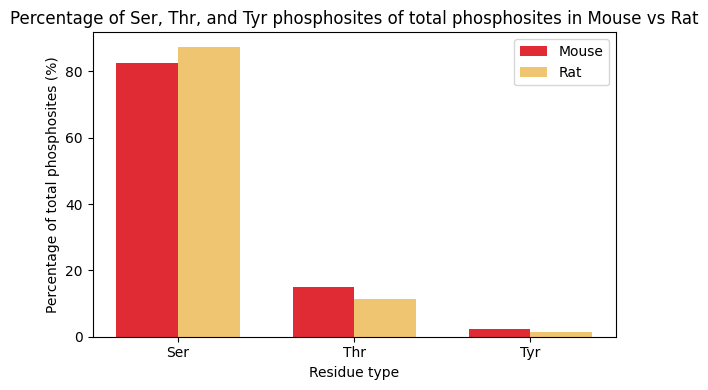

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
rat_path = "data/processed/rat/full_total_blast_aligned.csv"
mouse_path = "data/processed/mouse/full_total_blast_aligned.csv"

def calculate_phosphosite_percentages(path):
    df = pd.read_csv(path)
    total = len(df)
    percentages = {
        "Ser": (df["amino_acid"] == "S").sum() / total * 100,
        "Thr": (df["amino_acid"] == "T").sum() / total * 100,
        "Tyr": (df["amino_acid"] == "Y").sum() / total * 100
    }
    return percentages

# Calculate for both
rat_perc = calculate_phosphosite_percentages(rat_path)
mouse_perc = calculate_phosphosite_percentages(mouse_path)
print(rat_perc)
print(mouse_perc)

# Combine into DataFrame
data = pd.DataFrame({
    "residue": ["Ser", "Thr", "Tyr"],
    "mouse": [mouse_perc["Ser"], mouse_perc["Thr"], mouse_perc["Tyr"]],
    "rat": [rat_perc["Ser"], rat_perc["Thr"], rat_perc["Tyr"]]
})

# Melt for plotting
df_melted = data.melt(id_vars="residue", var_name="species", value_name="percent")

# Plot grouped bars
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
x = range(len(data["residue"]))

ax.bar([i - bar_width/2 for i in x], data["mouse"], width=bar_width, label="Mouse", color='#e02b35')
ax.bar([i + bar_width/2 for i in x], data["rat"], width=bar_width, label="Rat", color='#f0c571')

ax.set_xticks(x)
ax.set_xticklabels(data["residue"])
ax.set_ylabel("Percentage of total phosphosites (%)")
ax.set_xlabel("Residue type")
ax.set_title("Percentage of Ser, Thr, and Tyr phosphosites of total phosphosites in Mouse vs Rat")
ax.legend()
plt.tight_layout()
plt.show()



Above shows average percentages of types of phosphorylations across all tissue types in both rat and mouse species. Average is around 85% Ser, 13% Thr, and 2% Tyr distribution. This trend continues across tissue types too as shown below. 

In [20]:
# Calculate percentage of S, T, Y phosphosites in each tissue type
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_tissue_phosphosite_percentages(file_path, species_name):
    """
    Calculate percentage of S, T, Y phosphosites for each tissue type.
    For each tissue, calculate: (S/T/Y count in tissue) / (total phosphosites in tissue) * 100
    """
    df = pd.read_csv(file_path)
    
    # Define tissue columns based on species
    if species_name.lower() == 'rat':
        tissue_columns = ['all_brain', 'cortex', 'brainstem', 'cerebellum', 'testicle', 
                         'pancreas', 'stomach', 'liver', 'fat', 'intestine', 'kidney', 
                         'spleen', 'thymus', 'lung', 'muscle', 'heart', 'blood']
    else:  # mouse
        tissue_columns = ['brain', 'brownfat', 'heart', 'kidney', 'liver', 'lung', 
                         'pancreas', 'spleen', 'testis']
    
    results = {}
    
    for tissue in tissue_columns:
        if tissue in df.columns:
            # Filter rows where this tissue has a value > 0 (phosphosite found in this tissue)
            tissue_data = df[df[tissue] > 0]
            
            if len(tissue_data) > 0:
                # Calculate percentages for S, T, Y in this tissue
                total_in_tissue = len(tissue_data)
                s_count = (tissue_data['amino_acid'] == 'S').sum()
                t_count = (tissue_data['amino_acid'] == 'T').sum()
                y_count = (tissue_data['amino_acid'] == 'Y').sum()
                
                results[tissue] = {
                    'Ser': (s_count / total_in_tissue) * 100,
                    'Thr': (t_count / total_in_tissue) * 100,
                    'Tyr': (y_count / total_in_tissue) * 100,
                    'total_count': total_in_tissue
                }
    
    return results

# Calculate for both species
rat_results = calculate_tissue_phosphosite_percentages("data/processed/rat/full_total_blast_aligned.csv", "rat")
mouse_results = calculate_tissue_phosphosite_percentages("data/processed/mouse/full_total_blast_aligned.csv", "mouse")

print("Rat tissue phosphosite percentages:")
for tissue, data in rat_results.items():
    print(f"{tissue}: S={data['Ser']:.1f}%, T={data['Thr']:.1f}%, Y={data['Tyr']:.1f}% (n={data['total_count']})")

print("\nMouse tissue phosphosite percentages:")
for tissue, data in mouse_results.items():
    print(f"{tissue}: S={data['Ser']:.1f}%, T={data['Thr']:.1f}%, Y={data['Tyr']:.1f}% (n={data['total_count']})")


Rat tissue phosphosite percentages:
all_brain: S=88.5%, T=10.4%, Y=1.1% (n=8903)
cortex: S=88.5%, T=10.4%, Y=1.1% (n=6745)
brainstem: S=87.8%, T=11.1%, Y=1.1% (n=5782)
cerebellum: S=88.5%, T=10.4%, Y=1.1% (n=7221)
testicle: S=89.4%, T=9.9%, Y=0.7% (n=7356)
pancreas: S=89.5%, T=9.4%, Y=1.1% (n=2842)
stomach: S=88.6%, T=10.1%, Y=1.3% (n=5263)
liver: S=87.9%, T=10.8%, Y=1.3% (n=6246)
fat: S=88.0%, T=10.7%, Y=1.3% (n=5482)
intestine: S=89.1%, T=9.8%, Y=1.1% (n=7233)
kidney: S=89.2%, T=9.9%, Y=1.0% (n=6172)
spleen: S=88.7%, T=10.3%, Y=1.1% (n=8159)
thymus: S=89.1%, T=10.1%, Y=0.9% (n=8664)
lung: S=88.9%, T=10.0%, Y=1.1% (n=9115)
muscle: S=79.5%, T=16.8%, Y=3.7% (n=4346)
heart: S=87.1%, T=11.3%, Y=1.6% (n=5011)
blood: S=85.8%, T=13.1%, Y=1.2% (n=1630)

Mouse tissue phosphosite percentages:
brain: S=85.7%, T=12.9%, Y=1.4% (n=12871)
brownfat: S=84.1%, T=14.0%, Y=1.9% (n=7105)
heart: S=83.5%, T=14.7%, Y=1.8% (n=6702)
kidney: S=85.2%, T=13.1%, Y=1.7% (n=13132)
liver: S=84.8%, T=13.1%, Y=2.0% (n=

Creating Rat tissue phosphosite plot...


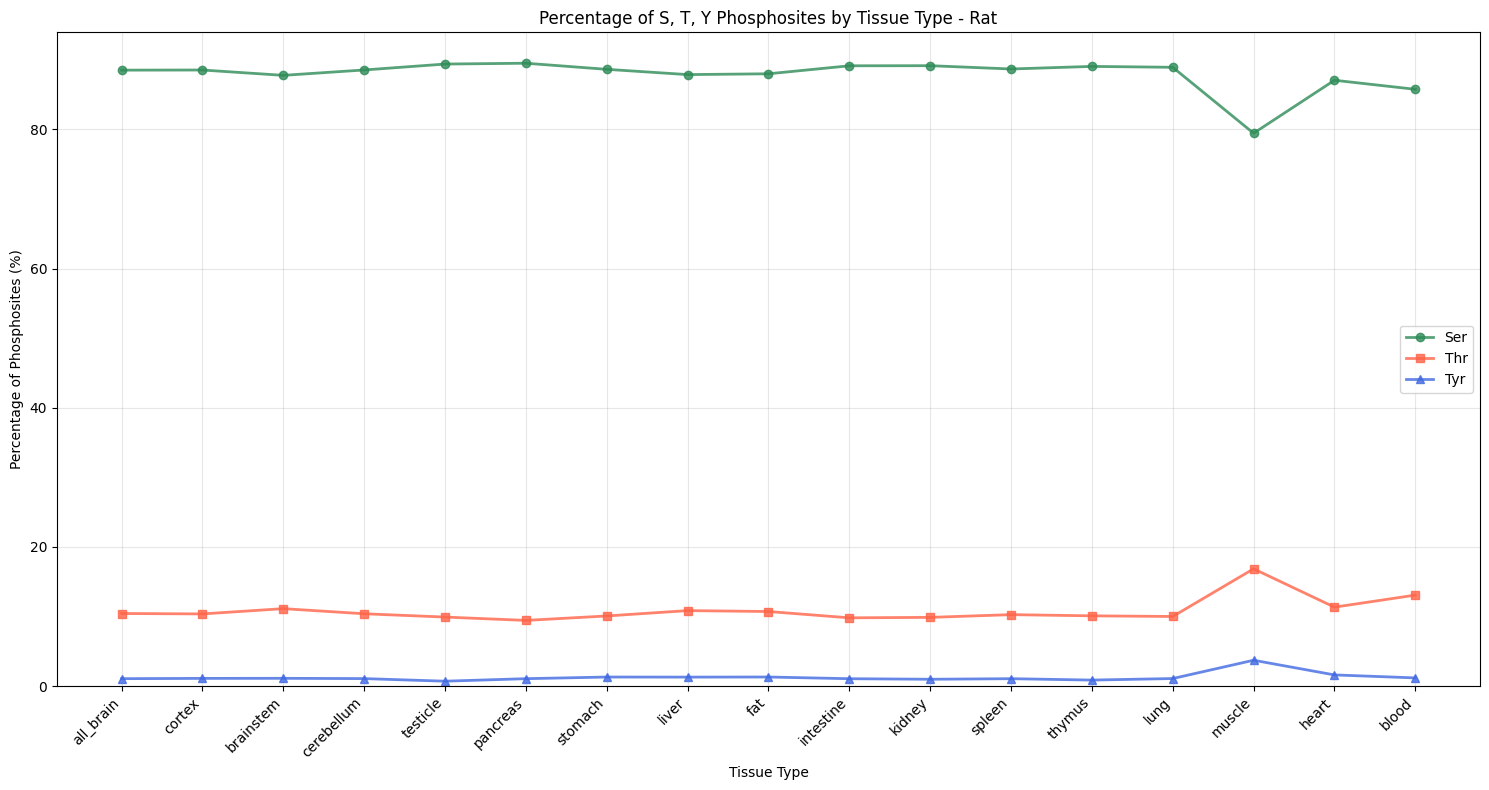


Creating Mouse tissue phosphosite plot...


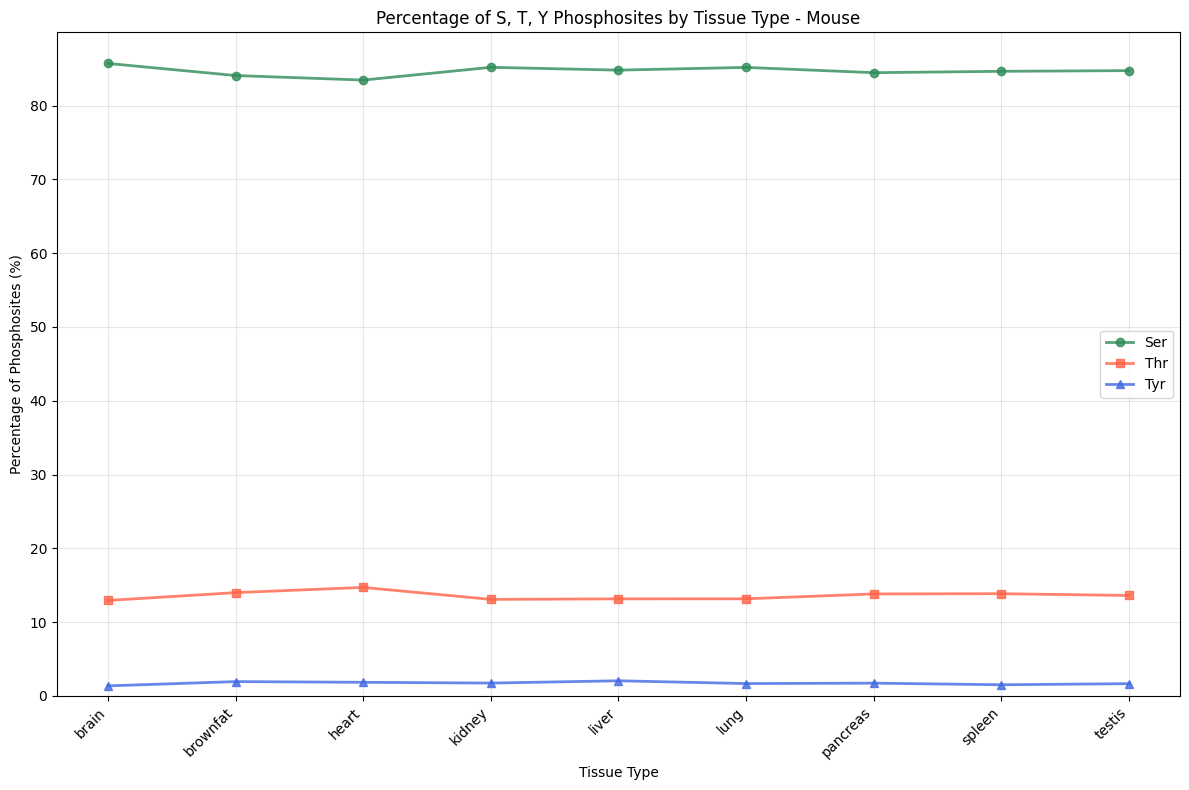

In [24]:
# Create visualizations for tissue-specific phosphosite percentages

def create_tissue_phosphosite_plot(results, species_name, figsize=(12, 8)):
    """
    Create a line plot with dots showing S, T, Y percentages for each tissue
    """
    # Prepare data for plotting
    tissues = list(results.keys())
    ser_percentages = [results[tissue]['Ser'] for tissue in tissues]
    thr_percentages = [results[tissue]['Thr'] for tissue in tissues]
    tyr_percentages = [results[tissue]['Tyr'] for tissue in tissues]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    x = np.arange(len(tissues))
    
    # Create lines with dots
    ax.plot(x, ser_percentages, 'o-', label='Ser', color='#2E8B57', linewidth=2, markersize=6, alpha=0.8)
    ax.plot(x, thr_percentages, 's-', label='Thr', color='#FF6347', linewidth=2, markersize=6, alpha=0.8)
    ax.plot(x, tyr_percentages, '^-', label='Tyr', color='#4169E1', linewidth=2, markersize=6, alpha=0.8)
    
    # Customize the plot
    ax.set_xlabel('Tissue Type')
    ax.set_ylabel('Percentage of Phosphosites (%)')
    ax.set_title(f'Percentage of S, T, Y Phosphosites by Tissue Type - {species_name.title()}')
    ax.set_xticks(x)
    ax.set_xticklabels(tissues, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Set y-axis to start from 0 for better visualization
    ax.set_ylim(bottom=0)
    
    plt.tight_layout()
    
    # Save the plot
    os.makedirs("outputs", exist_ok=True)
    plt.savefig(f"outputs/{species_name}_tissue_phosphosite_percentages.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"outputs/{species_name}_tissue_phosphosite_percentages.pdf", bbox_inches='tight')
    
    plt.show()

# Create plots for both species
print("Creating Rat tissue phosphosite plot...")
create_tissue_phosphosite_plot(rat_results, "rat", figsize=(15, 8))

print("\nCreating Mouse tissue phosphosite plot...")
create_tissue_phosphosite_plot(mouse_results, "mouse", figsize=(12, 8))


Above shows that percentages are relatively consistent across all tissue types, showing no biase towards a specific residue phosphoryaltion in a certain tissue. However, notably there is a bias in muscle tissue. Shows a decrease of Ser phosphoryaltions, and an increase of both Thr and Tyr. 

Rat tissue total phosphorylation sites (thousands):
  all_brain: 8.90k
  cortex: 6.75k
  brainstem: 5.78k
  cerebellum: 7.22k
  testicle: 7.36k
  pancreas: 2.84k
  stomach: 5.26k
  liver: 6.25k
  fat: 5.48k
  intestine: 7.23k
  kidney: 6.17k
  spleen: 8.16k
  thymus: 8.66k
  lung: 9.12k
  muscle: 4.35k
  heart: 5.01k
  blood: 1.63k

Mouse tissue total phosphorylation sites (thousands):
  brain: 12.87k
  brownfat: 7.11k
  heart: 6.70k
  kidney: 13.13k
  liver: 6.52k
  lung: 11.18k
  pancreas: 6.05k
  spleen: 11.86k
  testis: 10.20k


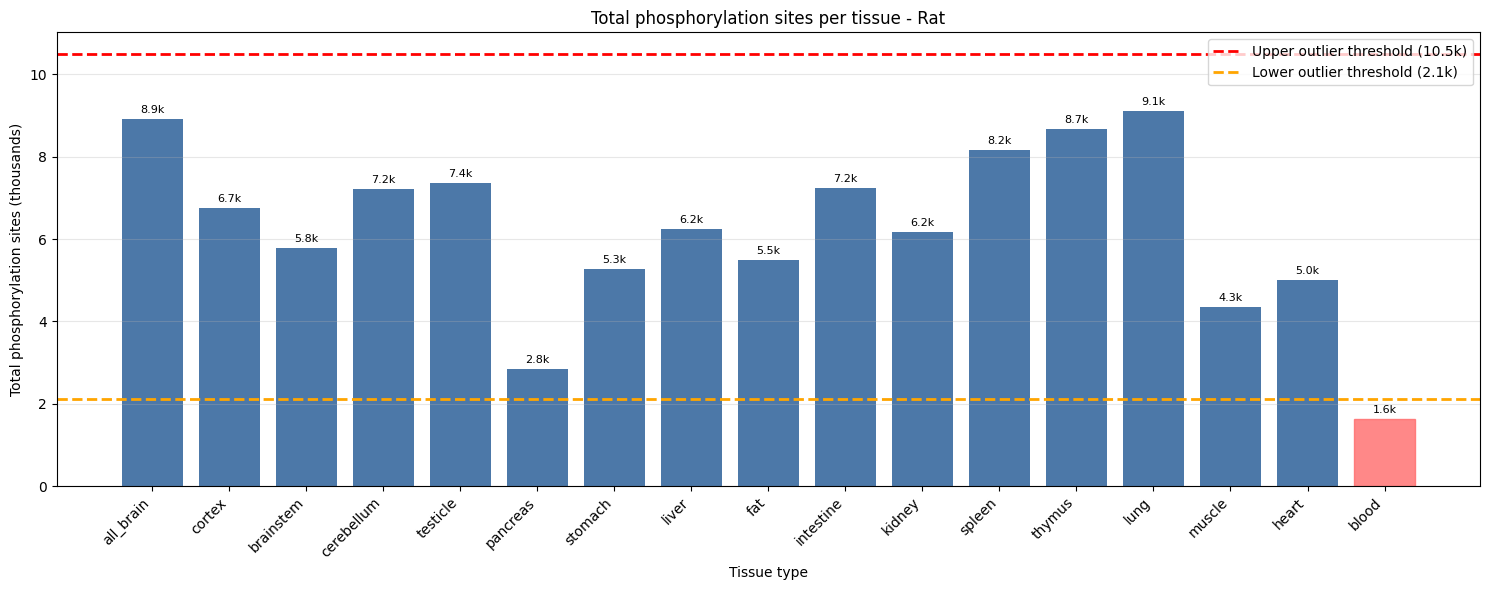


Rat outlier tissues:
  blood: 1.6k (Low outlier)
Thresholds: Upper = 10.5k, Lower = 2.1k


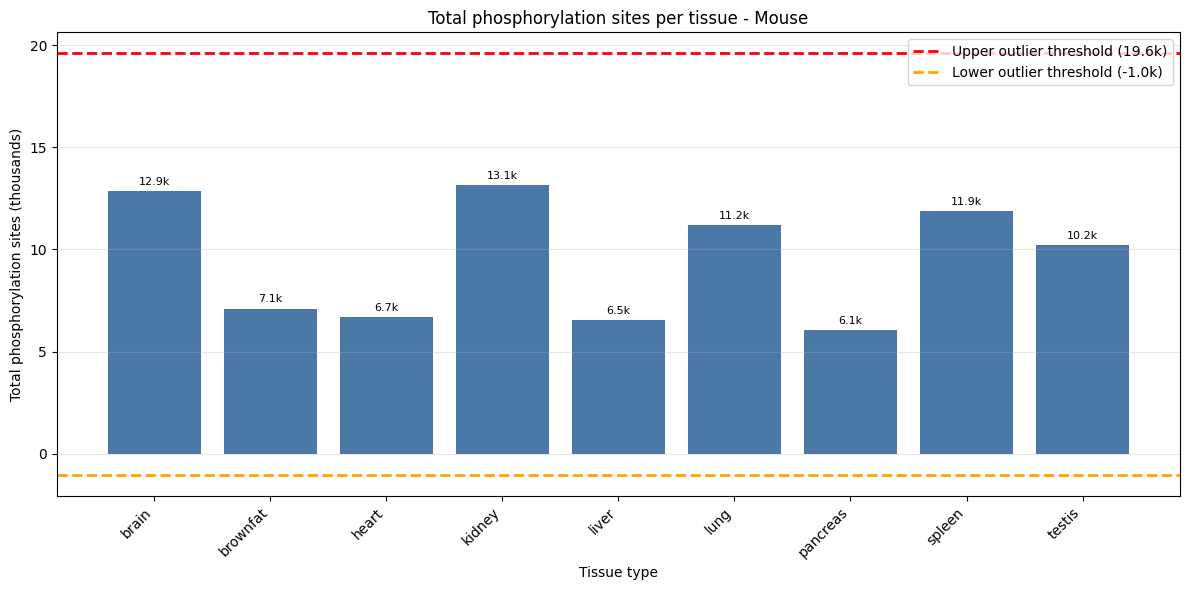


Mouse: No outlier tissues detected
Thresholds: Upper = 19.6k, Lower = -1.0k


In [25]:
# Total count of phosphorylation sites per tissue (in thousands)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define tissue columns
rat_tissues = ['all_brain', 'cortex', 'brainstem', 'cerebellum', 'testicle',
               'pancreas', 'stomach', 'liver', 'fat', 'intestine', 'kidney',
               'spleen', 'thymus', 'lung', 'muscle', 'heart', 'blood']
mouse_tissues = ['brain', 'brownfat', 'heart', 'kidney', 'liver', 'lung',
                 'pancreas', 'spleen', 'testis']

def compute_tissue_counts(path: str, tissue_cols: list[str]) -> dict[str, float]:
    """For each tissue, compute total count of rows with tissue > 0 (in thousands)."""
    df = pd.read_csv(path)
    counts = {}
    for col in tissue_cols:
        if col in df.columns:
            count = (df[col] > 0).sum()
            counts[col] = count / 1000.0  # Convert to thousands
    return counts

def plot_tissue_counts(counts: dict[str, float], species_name: str, figsize=(12, 6)):
    tissues = list(counts.keys())
    values = [counts[t] for t in tissues]

    fig, ax = plt.subplots(figsize=figsize)
    bars = ax.bar(tissues, values, color='#4C78A8')
    ax.set_ylabel('Total phosphorylation sites (thousands)')
    ax.set_xlabel('Tissue type')
    ax.set_title(f'Total phosphorylation sites per tissue - {species_name.title()}')
    ax.set_xticks(range(len(tissues)))
    ax.set_xticklabels(tissues, rotation=45, ha='right')
    ax.grid(True, axis='y', alpha=0.3)

    # Calculate outlier thresholds using IQR method
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    
    # Add horizontal lines for outlier thresholds
    ax.axhline(y=upper_threshold, color='red', linestyle='--', linewidth=2, 
               label=f'Upper outlier threshold ({upper_threshold:.1f}k)')
    ax.axhline(y=lower_threshold, color='orange', linestyle='--', linewidth=2, 
               label=f'Lower outlier threshold ({lower_threshold:.1f}k)')
    
    # Highlight outliers
    for i, (tissue, value) in enumerate(zip(tissues, values)):
        if value > upper_threshold or value < lower_threshold:
            bars[i].set_color('#FF6B6B')  # Red color for outliers
            bars[i].set_alpha(0.8)

    # Add labels on all bars
    for b in bars:
        h = b.get_height()
        ax.annotate(f'{h:.1f}k', (b.get_x() + b.get_width()/2, h),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)

    # Add legend
    ax.legend(loc='upper right')

    plt.tight_layout()
    os.makedirs('outputs', exist_ok=True)
    plt.savefig(f'outputs/{species_name}_tissue_total_phospho_counts.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'outputs/{species_name}_tissue_total_phospho_counts.pdf', bbox_inches='tight')
    plt.show()
    
    # Print outlier information
    outliers = [(tissue, value) for tissue, value in zip(tissues, values) 
                if value > upper_threshold or value < lower_threshold]
    
    if outliers:
        print(f"\n{species_name.title()} outlier tissues:")
        for tissue, value in outliers:
            outlier_type = "High" if value > upper_threshold else "Low"
            print(f"  {tissue}: {value:.1f}k ({outlier_type} outlier)")
    else:
        print(f"\n{species_name.title()}: No outlier tissues detected")
    
    print(f"Thresholds: Upper = {upper_threshold:.1f}k, Lower = {lower_threshold:.1f}k")

# Compute
rat_counts = compute_tissue_counts('data/processed/rat/full_total_blast_aligned.csv', rat_tissues)
mouse_counts = compute_tissue_counts('data/processed/mouse/full_total_blast_aligned.csv', mouse_tissues)

# Display tables in output
print('Rat tissue total phosphorylation sites (thousands):')
for k, v in rat_counts.items():
    print(f'  {k}: {v:.2f}k')

print('\nMouse tissue total phosphorylation sites (thousands):')
for k, v in mouse_counts.items():
    print(f'  {k}: {v:.2f}k')

# Plot
plot_tissue_counts(rat_counts, 'rat', figsize=(15, 6))
plot_tissue_counts(mouse_counts, 'mouse', figsize=(12, 6))


Above shows distribution of total count of phosphosites across each tissue type. In both mouse and rat, the tissue types with the highest number of phosphorylations are: in mouse - Brain, Kidney, Lung, Spleen, Testis - and similarly in rat - total brain tissues, cerebellum, testicle, spleen, thymus, and lung. 

However, after adding lines to represent the outliers with IQR interquartile range, only one was found - blood tissue in rat data. 

** Shown in the mouse paper:
- The number of phosphoproteins across tissue types in mouse data stays relatively consistent - while phosphorylation count changes - is high for brain, kidney, and spleen but very low for pancrease (roughly half the sites)
- The paper also shows that the number of phosphosites across each tissue type is relatively consistent. 

Current working directory: /Users/sofie/Desktop/gsponer-lab-work/phospho_root/notebooks
Calculating tissue overlap for Rat...
Looking for file: /Users/sofie/Desktop/gsponer-lab-work/phospho_root/data/processed/rat/full_total_blast_aligned.csv
File exists: True
Rat tissue overlap counts:
  1 tissues: 6,828 sites
  2 tissues: 3,445 sites
  3 tissues: 2,355 sites
  4 tissues: 2,434 sites
  5 tissues: 1,324 sites
  6 tissues: 1,066 sites
  7 tissues: 737 sites
  8 tissues: 676 sites
  9 tissues: 574 sites
  10 tissues: 495 sites
  11 tissues: 506 sites
  12 tissues: 400 sites
  13 tissues: 486 sites
  14 tissues: 398 sites
  15 tissues: 502 sites
  16 tissues: 448 sites
  17 tissues: 294 sites

Calculating tissue overlap for Mouse...
Looking for file: /Users/sofie/Desktop/gsponer-lab-work/phospho_root/data/processed/mouse/full_total_blast_aligned.csv
File exists: True
Mouse tissue overlap counts:
  1 tissues: 13,653 sites
  2 tissues: 4,965 sites
  3 tissues: 3,101 sites
  4 tissues: 2,214

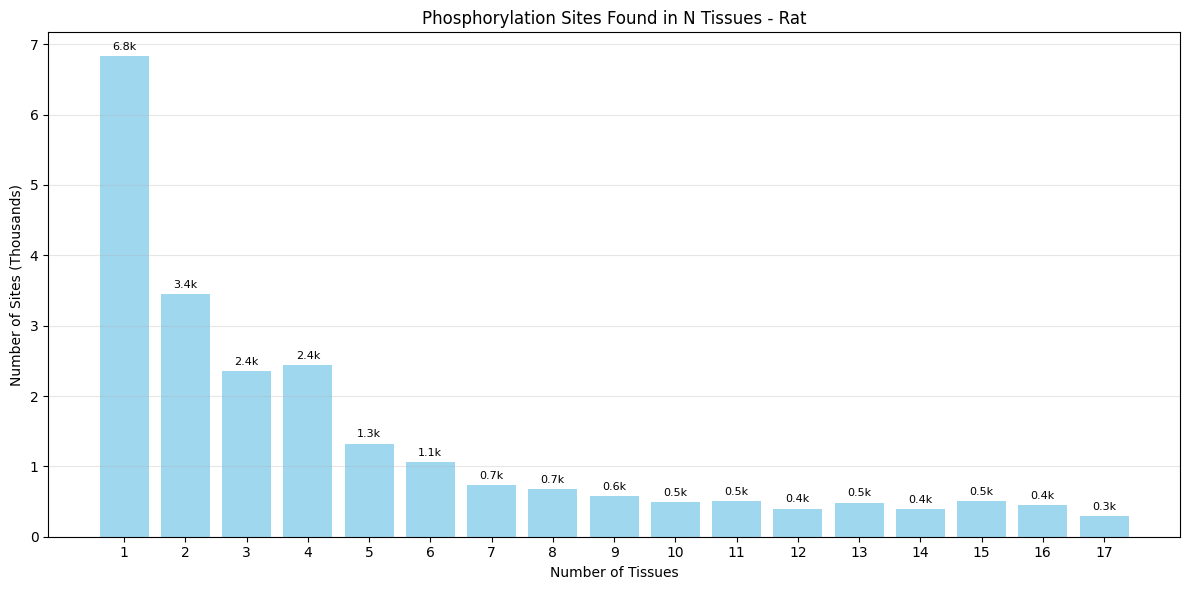

Creating Mouse tissue overlap plot...


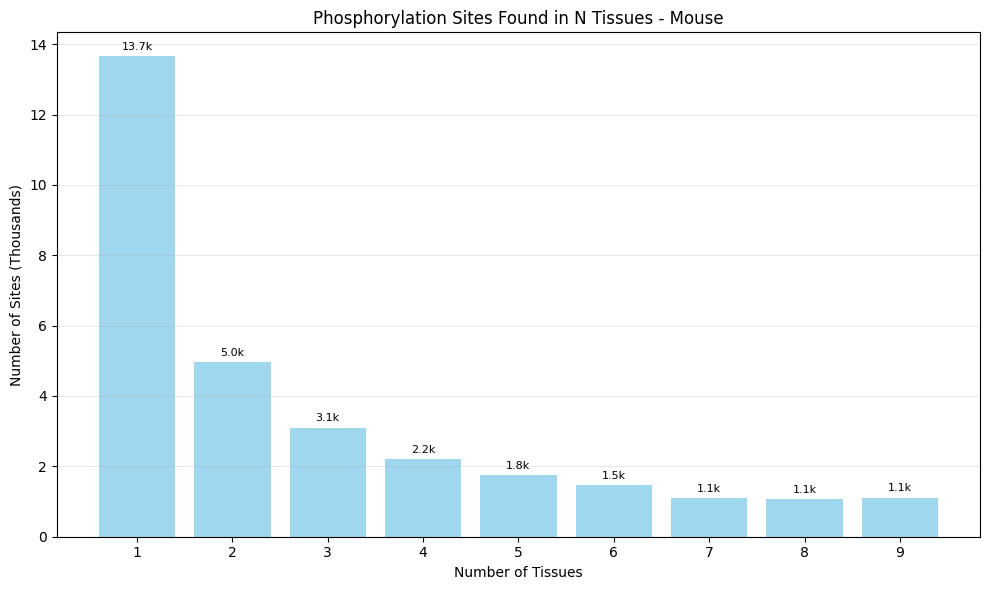

In [2]:
# Phosphosite tissue overlap analysis - Sites per tissue count
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define tissue columns
rat_tissues = ['all_brain', 'cortex', 'brainstem', 'cerebellum', 'testicle',
               'pancreas', 'stomach', 'liver', 'fat', 'intestine', 'kidney',
               'spleen', 'thymus', 'lung', 'muscle', 'heart', 'blood']
mouse_tissues = ['brain', 'brownfat', 'heart', 'kidney', 'liver', 'lung',
                 'pancreas', 'spleen', 'testis']

def calculate_tissue_overlap_data(file_path: str, tissue_cols: list[str]):
    """
    Calculate how many phosphosites are found in 1, 2, 3, etc. tissues
    """
    df = pd.read_csv(file_path)
    
    # Count how many tissues each phosphosite is found in
    df['tissue_count'] = df[tissue_cols].apply(lambda row: (row > 0).sum(), axis=1)
    
    # Count phosphosites by number of tissues they're found in
    tissue_overlap_counts = df['tissue_count'].value_counts().sort_index()
    
    # Fill in missing tissue counts with 0
    max_tissues = len(tissue_cols)
    full_counts = pd.Series(0, index=range(1, max_tissues + 1))
    full_counts.update(tissue_overlap_counts)
    
    return full_counts

def plot_tissue_overlap(counts: pd.Series, species_name: str, figsize=(10, 6)):
    """
    Create a bar chart showing phosphosite counts by number of tissues
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Convert to thousands
    counts_k = counts / 1000.0
    
    # Create bar chart
    bars = ax.bar(counts.index.astype(str), counts_k, color='skyblue', alpha=0.8)
    
    # Customize plot
    ax.set_xlabel('Number of Tissues')
    ax.set_ylabel('Number of Sites (Thousands)')
    ax.set_title(f'Phosphorylation Sites Found in N Tissues - {species_name.title()}')
    ax.grid(True, axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}k',
                       xy=(bar.get_x() + bar.get_width()/2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    
    # Save plot
    os.makedirs('outputs', exist_ok=True)
    plt.savefig(f'outputs/{species_name.lower()}_tissue_overlap_counts.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'outputs/{species_name.lower()}_tissue_overlap_counts.pdf', bbox_inches='tight')
    plt.show()

# Calculate for both species
print("Current working directory:", os.getcwd())

# Use absolute paths to ensure files are found
rat_file = '/Users/sofie/Desktop/gsponer-lab-work/phospho_root/data/processed/rat/full_total_blast_aligned.csv'
mouse_file = '/Users/sofie/Desktop/gsponer-lab-work/phospho_root/data/processed/mouse/full_total_blast_aligned.csv'

print("Calculating tissue overlap for Rat...")
print(f"Looking for file: {rat_file}")
print(f"File exists: {os.path.exists(rat_file)}")
rat_overlap = calculate_tissue_overlap_data(rat_file, rat_tissues)
print("Rat tissue overlap counts:")
for tissues, count in rat_overlap.items():
    if count > 0:
        print(f"  {tissues} tissues: {count:,} sites")

print("\nCalculating tissue overlap for Mouse...")
print(f"Looking for file: {mouse_file}")
print(f"File exists: {os.path.exists(mouse_file)}")
mouse_overlap = calculate_tissue_overlap_data(mouse_file, mouse_tissues)
print("Mouse tissue overlap counts:")
for tissues, count in mouse_overlap.items():
    if count > 0:
        print(f"  {tissues} tissues: {count:,} sites")

# Create plots
print("\nCreating Rat tissue overlap plot...")
plot_tissue_overlap(rat_overlap, 'rat', figsize=(12, 6))

print("Creating Mouse tissue overlap plot...")
plot_tissue_overlap(mouse_overlap, 'mouse', figsize=(10, 6))


=== TISSUE SPECIFICITY ANALYSIS ===

RAT ANALYSIS:
Total phosphosites: 23,004
Tissue-specific (1 tissue): 6,828 (29.7%)
Multi-tissue (2+ tissues): 16,140 (70.2%)

Breakdown by tissue count:
  0 tissues: 36 sites (0.2%)
  1 tissues: 6,828 sites (29.7%)
  2 tissues: 3,445 sites (15.0%)
  3 tissues: 2,355 sites (10.2%)
  4 tissues: 2,434 sites (10.6%)
  5 tissues: 1,324 sites (5.8%)
  6 tissues: 1,066 sites (4.6%)
  7 tissues: 737 sites (3.2%)
  8 tissues: 676 sites (2.9%)
  9 tissues: 574 sites (2.5%)
  10 tissues: 495 sites (2.2%)
  11 tissues: 506 sites (2.2%)
  12 tissues: 400 sites (1.7%)
  13 tissues: 486 sites (2.1%)
  14 tissues: 398 sites (1.7%)
  15 tissues: 502 sites (2.2%)
  16 tissues: 448 sites (1.9%)
  17 tissues: 294 sites (1.3%)


MOUSE ANALYSIS:
Total phosphosites: 30,442
Tissue-specific (1 tissue): 13,653 (44.8%)
Multi-tissue (2+ tissues): 16,789 (55.2%)

Breakdown by tissue count:
  1 tissues: 13,653 sites (44.8%)
  2 tissues: 4,965 sites (16.3%)
  3 tissues: 3,101 sit

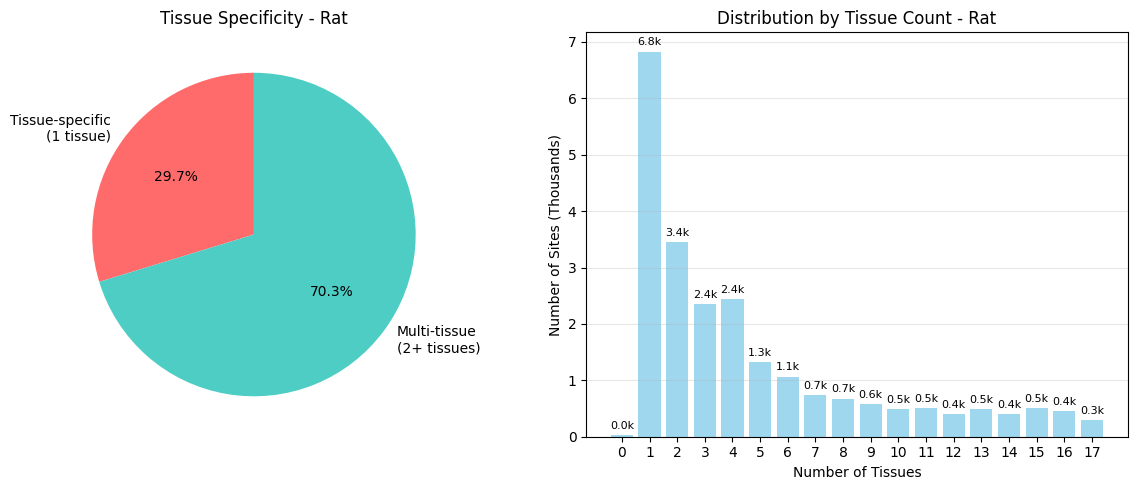

Creating Mouse tissue specificity plots...


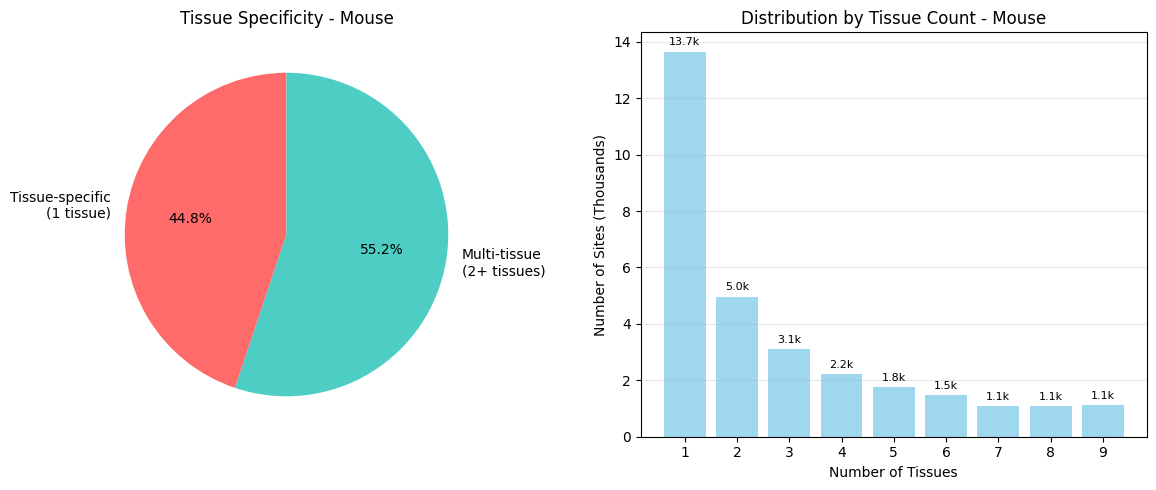


SUMMARY COMPARISON:
Rat tissue-specific phosphosites: 29.7%
Mouse tissue-specific phosphosites: 44.8%
Difference: 15.2 percentage points


In [3]:
# Calculate percentage of tissue-specific phosphosites (found in only one tissue)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define tissue columns
rat_tissues = ['all_brain', 'cortex', 'brainstem', 'cerebellum', 'testicle',
               'pancreas', 'stomach', 'liver', 'fat', 'intestine', 'kidney',
               'spleen', 'thymus', 'lung', 'muscle', 'heart', 'blood']
mouse_tissues = ['brain', 'brownfat', 'heart', 'kidney', 'liver', 'lung',
                 'pancreas', 'spleen', 'testis']

def calculate_tissue_specific_percentage(file_path: str, tissue_cols: list[str], species_name: str):
    """
    Calculate the percentage of phosphosites that are tissue-specific (found in only one tissue)
    """
    df = pd.read_csv(file_path)
    
    # Count how many tissues each phosphosite is found in
    df['tissue_count'] = df[tissue_cols].apply(lambda row: (row > 0).sum(), axis=1)
    
    # Calculate percentages
    total_phosphosites = len(df)
    tissue_specific_count = (df['tissue_count'] == 1).sum()
    tissue_specific_percentage = (tissue_specific_count / total_phosphosites) * 100
    
    # Also calculate multi-tissue phosphosites
    multi_tissue_count = (df['tissue_count'] > 1).sum()
    multi_tissue_percentage = (multi_tissue_count / total_phosphosites) * 100
    
    # Get breakdown by tissue count
    tissue_count_breakdown = df['tissue_count'].value_counts().sort_index()
    
    return {
        'total_phosphosites': total_phosphosites,
        'tissue_specific_count': tissue_specific_count,
        'tissue_specific_percentage': tissue_specific_percentage,
        'multi_tissue_count': multi_tissue_count,
        'multi_tissue_percentage': multi_tissue_percentage,
        'tissue_count_breakdown': tissue_count_breakdown
    }

def plot_tissue_specificity(results: dict, species_name: str):
    """
    Create a pie chart showing tissue-specific vs multi-tissue phosphosites
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart for tissue specificity
    labels = ['Tissue-specific\n(1 tissue)', 'Multi-tissue\n(2+ tissues)']
    sizes = [results['tissue_specific_percentage'], results['multi_tissue_percentage']]
    colors = ['#FF6B6B', '#4ECDC4']
    
    ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax1.set_title(f'Tissue Specificity - {species_name.title()}')
    
    # Bar chart showing distribution by tissue count
    tissue_counts = results['tissue_count_breakdown']
    counts_k = tissue_counts.values / 1000.0  # Convert to thousands
    
    bars = ax2.bar(tissue_counts.index.astype(str), counts_k, color='skyblue', alpha=0.8)
    ax2.set_xlabel('Number of Tissues')
    ax2.set_ylabel('Number of Sites (Thousands)')
    ax2.set_title(f'Distribution by Tissue Count - {species_name.title()}')
    ax2.grid(True, axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.annotate(f'{height:.1f}k',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    
    # Save plot
    os.makedirs('outputs', exist_ok=True)
    plt.savefig(f'outputs/{species_name.lower()}_tissue_specificity.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'outputs/{species_name.lower()}_tissue_specificity.pdf', bbox_inches='tight')
    plt.show()

# Calculate for both species
print("=== TISSUE SPECIFICITY ANALYSIS ===\n")

# Rat analysis
print("RAT ANALYSIS:")
rat_file = '/Users/sofie/Desktop/gsponer-lab-work/phospho_root/data/processed/rat/full_total_blast_aligned.csv'
rat_results = calculate_tissue_specific_percentage(rat_file, rat_tissues, 'rat')

print(f"Total phosphosites: {rat_results['total_phosphosites']:,}")
print(f"Tissue-specific (1 tissue): {rat_results['tissue_specific_count']:,} ({rat_results['tissue_specific_percentage']:.1f}%)")
print(f"Multi-tissue (2+ tissues): {rat_results['multi_tissue_count']:,} ({rat_results['multi_tissue_percentage']:.1f}%)")
print("\nBreakdown by tissue count:")
for tissues, count in rat_results['tissue_count_breakdown'].items():
    if count > 0:
        percentage = (count / rat_results['total_phosphosites']) * 100
        print(f"  {tissues} tissues: {count:,} sites ({percentage:.1f}%)")

print("\n" + "="*50)

# Mouse analysis
print("\nMOUSE ANALYSIS:")
mouse_file = '/Users/sofie/Desktop/gsponer-lab-work/phospho_root/data/processed/mouse/full_total_blast_aligned.csv'
mouse_results = calculate_tissue_specific_percentage(mouse_file, mouse_tissues, 'mouse')

print(f"Total phosphosites: {mouse_results['total_phosphosites']:,}")
print(f"Tissue-specific (1 tissue): {mouse_results['tissue_specific_count']:,} ({mouse_results['tissue_specific_percentage']:.1f}%)")
print(f"Multi-tissue (2+ tissues): {mouse_results['multi_tissue_count']:,} ({mouse_results['multi_tissue_percentage']:.1f}%)")
print("\nBreakdown by tissue count:")
for tissues, count in mouse_results['tissue_count_breakdown'].items():
    if count > 0:
        percentage = (count / mouse_results['total_phosphosites']) * 100
        print(f"  {tissues} tissues: {count:,} sites ({percentage:.1f}%)")

# Create visualizations
print("\nCreating Rat tissue specificity plots...")
plot_tissue_specificity(rat_results, 'rat')

print("Creating Mouse tissue specificity plots...")
plot_tissue_specificity(mouse_results, 'mouse')

# Summary comparison
print("\n" + "="*50)
print("SUMMARY COMPARISON:")
print(f"Rat tissue-specific phosphosites: {rat_results['tissue_specific_percentage']:.1f}%")
print(f"Mouse tissue-specific phosphosites: {mouse_results['tissue_specific_percentage']:.1f}%")
print(f"Difference: {abs(rat_results['tissue_specific_percentage'] - mouse_results['tissue_specific_percentage']):.1f} percentage points")


=== TISSUE SPECIFICITY ANALYSIS (SIMPLIFIED BRAIN REGIONS) ===

RAT ANALYSIS (Simplified Brain Regions):
Total phosphosites: 23,004
Tissue-specific (1 tissue): 9,575 (41.6%)
Multi-tissue (2+ tissues): 13,393 (58.2%)

Breakdown by tissue count:
  0 tissues: 36 sites (0.2%)
  1 tissues: 9,575 sites (41.6%)
  2 tissues: 3,354 sites (14.6%)
  3 tissues: 1,906 sites (8.3%)
  4 tissues: 1,384 sites (6.0%)
  5 tissues: 1,061 sites (4.6%)
  6 tissues: 933 sites (4.1%)
  7 tissues: 741 sites (3.2%)
  8 tissues: 725 sites (3.2%)
  9 tissues: 595 sites (2.6%)
  10 tissues: 664 sites (2.9%)
  11 tissues: 567 sites (2.5%)
  12 tissues: 596 sites (2.6%)
  13 tissues: 527 sites (2.3%)
  14 tissues: 340 sites (1.5%)

Creating Rat tissue specificity plot (simplified brain regions)...


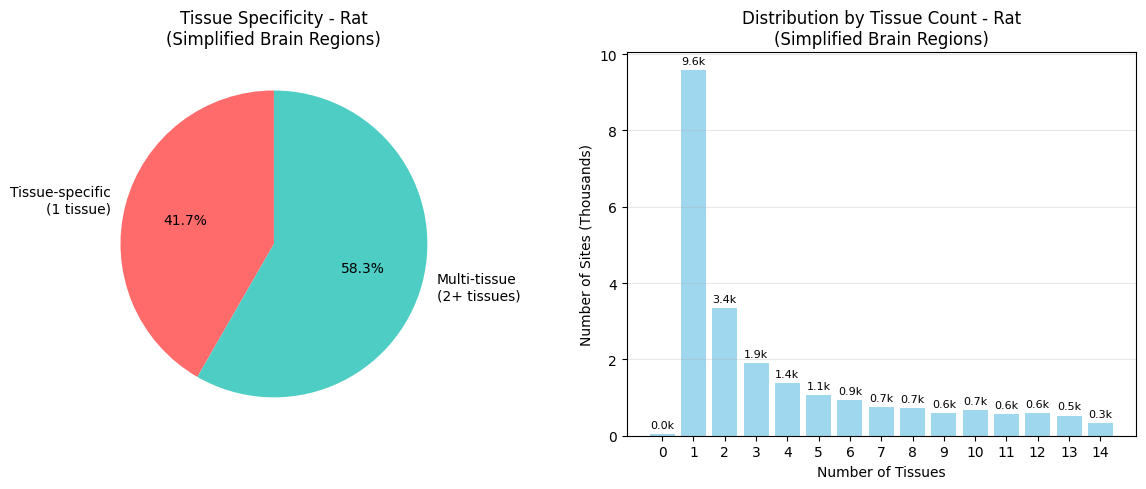


COMPARISON: Original vs Simplified Brain Regions
Original analysis (all brain regions): 29.7% tissue-specific
Simplified analysis (all_brain only): 41.6% tissue-specific
Difference: 11.9 percentage points


In [4]:
# Calculate percentage of tissue-specific phosphosites for Rat (simplified brain regions)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define simplified tissue columns for rat (using only all_brain, not specific brain regions)
rat_tissues_simplified = ['all_brain', 'testicle', 'pancreas', 'stomach', 'liver', 'fat', 
                          'intestine', 'kidney', 'spleen', 'thymus', 'lung', 'muscle', 'heart', 'blood']

def calculate_tissue_specific_percentage_simplified(file_path: str, tissue_cols: list[str], species_name: str):
    """
    Calculate the percentage of phosphosites that are tissue-specific (found in only one tissue)
    using simplified tissue categories
    """
    df = pd.read_csv(file_path)
    
    # Count how many tissues each phosphosite is found in
    df['tissue_count'] = df[tissue_cols].apply(lambda row: (row > 0).sum(), axis=1)
    
    # Calculate percentages
    total_phosphosites = len(df)
    tissue_specific_count = (df['tissue_count'] == 1).sum()
    tissue_specific_percentage = (tissue_specific_count / total_phosphosites) * 100
    
    # Also calculate multi-tissue phosphosites
    multi_tissue_count = (df['tissue_count'] > 1).sum()
    multi_tissue_percentage = (multi_tissue_count / total_phosphosites) * 100
    
    # Get breakdown by tissue count
    tissue_count_breakdown = df['tissue_count'].value_counts().sort_index()
    
    return {
        'total_phosphosites': total_phosphosites,
        'tissue_specific_count': tissue_specific_count,
        'tissue_specific_percentage': tissue_specific_percentage,
        'multi_tissue_count': multi_tissue_count,
        'multi_tissue_percentage': multi_tissue_percentage,
        'tissue_count_breakdown': tissue_count_breakdown
    }

def plot_tissue_specificity_simplified(results: dict, species_name: str):
    """
    Create a pie chart showing tissue-specific vs multi-tissue phosphosites
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart for tissue specificity
    labels = ['Tissue-specific\n(1 tissue)', 'Multi-tissue\n(2+ tissues)']
    sizes = [results['tissue_specific_percentage'], results['multi_tissue_percentage']]
    colors = ['#FF6B6B', '#4ECDC4']
    
    ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax1.set_title(f'Tissue Specificity - {species_name.title()}\n(Simplified Brain Regions)')
    
    # Bar chart showing distribution by tissue count
    tissue_counts = results['tissue_count_breakdown']
    counts_k = tissue_counts.values / 1000.0  # Convert to thousands
    
    bars = ax2.bar(tissue_counts.index.astype(str), counts_k, color='skyblue', alpha=0.8)
    ax2.set_xlabel('Number of Tissues')
    ax2.set_ylabel('Number of Sites (Thousands)')
    ax2.set_title(f'Distribution by Tissue Count - {species_name.title()}\n(Simplified Brain Regions)')
    ax2.grid(True, axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.annotate(f'{height:.1f}k',
                        xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    
    # Save plot
    os.makedirs('outputs', exist_ok=True)
    plt.savefig(f'outputs/{species_name.lower()}_tissue_specificity_simplified.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'outputs/{species_name.lower()}_tissue_specificity_simplified.pdf', bbox_inches='tight')
    plt.show()

# Calculate for rat with simplified brain regions
print("=== TISSUE SPECIFICITY ANALYSIS (SIMPLIFIED BRAIN REGIONS) ===\n")

# Rat analysis with simplified brain regions
print("RAT ANALYSIS (Simplified Brain Regions):")
rat_file = '/Users/sofie/Desktop/gsponer-lab-work/phospho_root/data/processed/rat/full_total_blast_aligned.csv'
rat_results_simplified = calculate_tissue_specific_percentage_simplified(rat_file, rat_tissues_simplified, 'rat')

print(f"Total phosphosites: {rat_results_simplified['total_phosphosites']:,}")
print(f"Tissue-specific (1 tissue): {rat_results_simplified['tissue_specific_count']:,} ({rat_results_simplified['tissue_specific_percentage']:.1f}%)")
print(f"Multi-tissue (2+ tissues): {rat_results_simplified['multi_tissue_count']:,} ({rat_results_simplified['multi_tissue_percentage']:.1f}%)")
print("\nBreakdown by tissue count:")
for tissues, count in rat_results_simplified['tissue_count_breakdown'].items():
    if count > 0:
        percentage = (count / rat_results_simplified['total_phosphosites']) * 100
        print(f"  {tissues} tissues: {count:,} sites ({percentage:.1f}%)")

# Create visualization
print("\nCreating Rat tissue specificity plot (simplified brain regions)...")
plot_tissue_specificity_simplified(rat_results_simplified, 'rat')

# Compare with original analysis
print("\n" + "="*50)
print("COMPARISON: Original vs Simplified Brain Regions")
print(f"Original analysis (all brain regions): {rat_results['tissue_specific_percentage']:.1f}% tissue-specific")
print(f"Simplified analysis (all_brain only): {rat_results_simplified['tissue_specific_percentage']:.1f}% tissue-specific")
print(f"Difference: {abs(rat_results['tissue_specific_percentage'] - rat_results_simplified['tissue_specific_percentage']):.1f} percentage points")


Rat data could have a largely different tissues specificity due to the fact that it has multiple brain tissue types, if we ignored all but the total brain tissue I wounder how it would be different?